# The impact of contact tracing: simulation study

I am puzzled by the fact that the current debate around a possible tracking app is focusing on the privacy issue instead of its relevance for containing the virus. We are ready to give our geolocation data to avoid a traffic jam but not to save lives! 

There are quite a few limitations to the current proposals for contact tracing as it is very well explained by Ross Anderson in [Contact Tracing in the Real World](https://www.lightbluetouchpaper.org/2020/04/12/contact-tracing-in-the-real-world/). But technology will probably play a crucial role if it is shown to be efficient and if public trust it.

Here I try to explain the impact of contact tracing on a simple model through simulations. The model consits of 4 compartments: S for the number of susceptible, I for the number of infectious, Sy for the number of sick and R for the number of recovered or deceased (or immune) individuals. The main assumptions of the model are:
 - only infectious individuals will propagate the virus to susceptible individuals. 
 - all infectious individuals will become after some time sick individuals with symptoms (ther is no asymptomatic cases) and finally recovered individuals
 - sick individuals are not transmitting the virus (for example, they are isolated)
 - recovered individuals cannot be infected anymore.
  
In such a model, if infectious individuals could be detected and isolated, the virus would not propagate. As a result, with a global lockdown (i.e. isolating everybody), the epidemics stops. But the set of infectious individuals is the minimal set of individuals to isolate to immediatly stop the epidemics. The question is then: can contact tracing help identifying these infectious individuals?

To model contact tracing, we simulate individuals moving in random directions. Each time, two individuals are sufficiently close, their ids are exchanged. When an individual becomes sick, any individual who met him/her in the last few days is put in isolation for a few days. We see that contact tracing can help mitigating the epidemics by isolating infectious individuals who will not be able to propagate the virus and by isolating susceptible individuals who will not get infected.


# This model is not predictive for the COVID-19

More details about the model used below: an susceptible individual getting infected, will stay a random time in state Infectious (uniform [2,5] days) and then become sick and in isolation for another random time before recovering. The time to recover since infection is uniform [9,11] days. Each moving individual follows a random waypoint mobility model and they have all the same speed. 
The radius of contagion and of contact is the same (3 pixels) and the probability of contagion when contact is 0.6. The initial fraction of Infectious is 5% of the population.

For the contact tracing scenario, if in contact within the previous 5 days, an individual is in isolation for 5 days. We assume that all individuals follow the rules.

# Qualitative conclusions:

Without contact tracing, ~92% of the population is infected with ~91% of the population sick at the peak.

With contact tracing, ~44% of the population is infected with a peak of sick population at the same level. During the peak of the epidemics, ~70% of the susceptible and infectious population (i.e. the population not having or not aware of having the virus) is actually put in isolation.

In this model, contact tracing (which is strictly observed by everybody) contains the epidemics by enforcing a 'smooth' lockdown around the peak of the epidemics.

## ! precise numbers vary between experiments !

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import numpy as np
from simulation.simulation_tracing import Simu
from simulation.utils import make_anim

# 1. No contact tracing

In [2]:
simu_notracing = Simu(n=1000,n_time=300, delta_time = 0, time_protected = -1)

In [3]:
simu_notracing.make_simu()

In [4]:
infected_n = simu_notracing.all_infected()
susceptible_n = simu_notracing.all_susceptible()
symptoms_n = simu_notracing.all_symptoms()
recovered_n = simu_notracing.all_last()

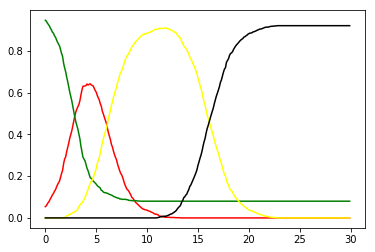

In [5]:
plt.plot(np.arange(0,30,0.1),infected_n, 'red')
plt.plot(np.arange(0,30,0.1),susceptible_n, 'green')
plt.plot(np.arange(0,30,0.1),symptoms_n, 'yellow')
plt.plot(np.arange(0,30,0.1),recovered_n, 'black')

In [6]:
recovered_n[-1]

0.92

In [7]:
max(symptoms_n)

0.909

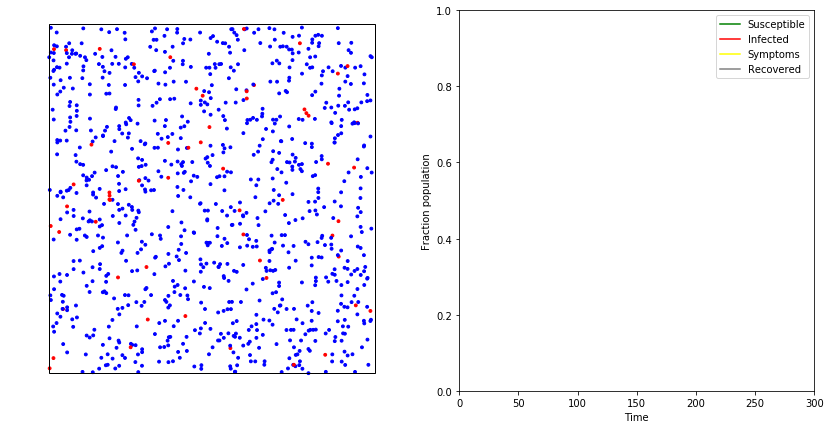

In [8]:
anim = make_anim(simu_notracing);

In [9]:
HTML(anim.to_html5_video())

# 2. Contact tracing

In [10]:
simu_tracing = Simu(n=1000,n_time=300, delta_time = 50, time_protected = 50)

In [11]:
simu_tracing.make_simu()

In [12]:
infected_t = simu_tracing.all_infected()
susceptible_t = simu_tracing.all_susceptible()
symptoms_t = simu_tracing.all_symptoms()
recovered_t = simu_tracing.all_last()

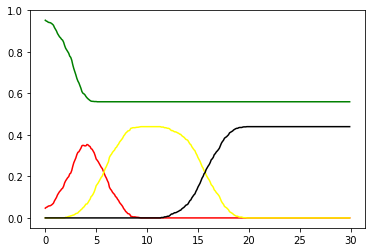

In [13]:
plt.plot(np.arange(0,30,0.1),infected_t, 'red')
plt.plot(np.arange(0,30,0.1),susceptible_t, 'green')
plt.plot(np.arange(0,30,0.1),symptoms_t, 'yellow')
plt.plot(np.arange(0,30,0.1),recovered_t, 'black')

In [14]:
recovered_t[-1]

0.44

In [15]:
max(symptoms_t)

0.44

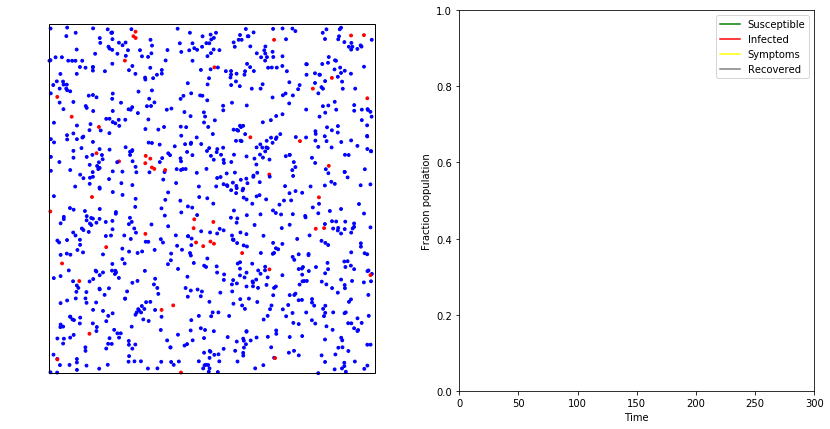

In [16]:
anim = make_anim(simu_tracing);

In [17]:
HTML(anim.to_html5_video())

The color of the individuals are:
 - green for Susceptible in isolation (fixed)
 - blue for Susceptible not in isolation (moving)
 - orange for Infectious in isolation (fixed)
 - red for Infectious not in isolation (moving)
 - yellow for Symptoms in isolation (fixed)
 - grey for Recovered (moving or fixed)

In [18]:
p_infected = simu_tracing.all_protected_infected()
p_susceptible = simu_tracing.all_protected_susceptible()
p_symptoms = simu_tracing.all_protected_symptoms()
p_recovered = simu_tracing.all_protected_last()

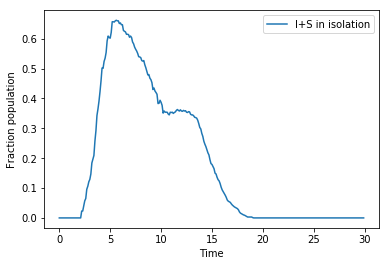

In [19]:
#plt.plot(np.arange(0,30,0.1),p_susceptible+p_symptoms+p_infected+p_recovered)
plt.plot(np.arange(0,30,0.1),p_susceptible+p_infected, label="I+S in isolation")
plt.xlabel("Time")
plt.ylabel("Fraction population")
plt.legend();

Fraction of I + S in isolation as a fraction of the total population.

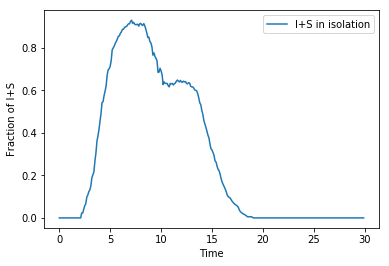

In [20]:
plt.plot(np.arange(0,30,0.1),(p_susceptible+p_infected)/(infected_t+susceptible_t), label="I+S in isolation")
plt.xlabel("Time")
plt.ylabel("Fraction of I+S")
plt.legend();

Fraction of I + S in isolation as a fraction of the population I + S (i.e. people not contaminated or ignoring that they are).